##DANIEL DABA DIEUMERCI ##Master 1 / MIAGE/ISIG-GOMA ##LE 16/07/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#chargement des donnees
dataset=pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


#Repartition des donnees en X et Y

In [3]:
X=dataset.YearsExperience.values
Y=dataset.Salary.values
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [4]:
#convertir en vecteur lisible par scikitlearn
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


##Division des donnees en TrainData(70%) et TestData(30%)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=0)

Entrainement du modele

In [7]:
from sklearn.linear_model import LinearRegression
#on creer l'objet
linearReg=LinearRegression()
#on fait l'entrainement du modele
linearReg.fit(X_train,y_train)


LinearRegression()

In [8]:
#Prediction
pred_train=linearReg.predict(X_test)

In [9]:
#Test avec une valeur quelconque
print(linearReg.predict([[2]]))

[[38743.06614315]]


In [11]:
#Test avec 15 annee d'expereience
print(linearReg.predict([[15]]))

[[161107.79247241]]


VISUALISATION DES DONNEE ENTRAINEMENT

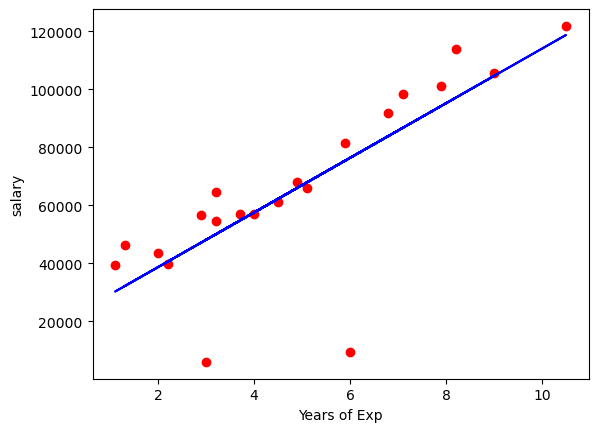

In [12]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,linearReg.predict(X_train), color='blue')
plt.xlabel('Years of Exp')
plt.ylabel('salary')
plt.show()

#visualisation of testing set

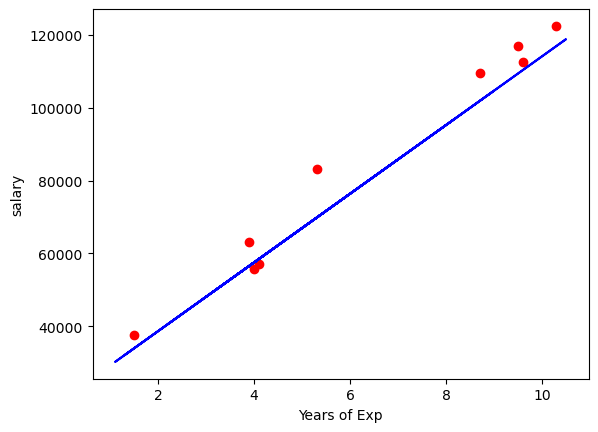

In [13]:
plt.scatter(X_test,y_test, color='red')
plt.plot(X_train,linearReg.predict(X_train), color='blue')
plt.xlabel('Years of Exp')
plt.ylabel('salary')
plt.show()

#evaluation du modele

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
r2= r2_score(y_test,pred_train)
print("R2=",r2)
rmse=np.sqrt(mean_squared_error(y_test,pred_train))
print("Racine carree de l'erreur quadratique moy=",rmse)

R2= 0.9518378236760241
Racine carree de l'erreur quadratique moy= 6592.159862835893


In [15]:
#exportation du model
import pickle
with open('model_salary_data.pkl','wb') as model_file:
    pickle.dump(linearReg,model_file)